# Contranst Enhancement

In [2]:
# imports
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image

## get inputs

In [3]:
# read inputs
beans = Image.open('data/Beans.png').convert('LA')

In [4]:
# convert inputs
beans_arr = np.asarray(beans)
beans_arr = beans_arr[:,:,0]

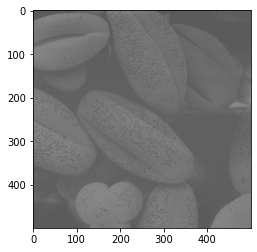

In [5]:
# show input 
plt.imshow(beans_arr, cmap='gray', vmin=0, vmax=255)
plt.show()

## visualize data

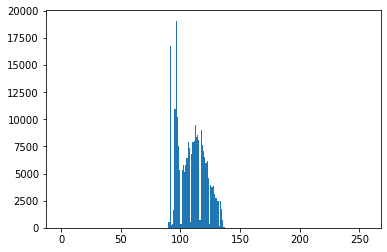

In [6]:
beans_flat = beans_arr.flatten()
plt.hist(beans_flat, bins=255, range=(0,255))
plt.show()

## contrance enhancement

#### find hist arr 

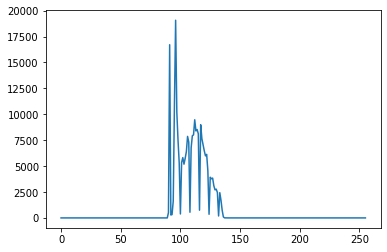

In [7]:
def get_hist(flat_arr):
    histogram = np.zeros(256)
    for i in flat_arr:
        histogram[i] += 1
    return histogram
hist = get_hist(beans_flat)
plt.plot(hist)
plt.show()

#### normalize histogram arr

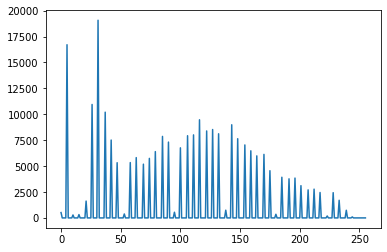

In [8]:
beans_flat_norm = beans_flat - beans_flat.min()
beans_flat_norm = beans_flat_norm / (beans_flat.max() - beans_flat.min())
beans_flat_norm = beans_flat_norm * 255
beans_flat_norm = beans_flat_norm.astype('uint8')
norm = get_hist(beans_flat_norm)
plt.plot(norm)

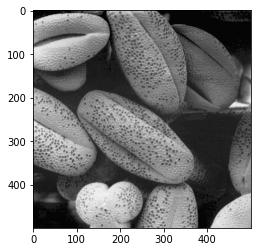

In [9]:
new_img_norm = np.reshape(beans_flat_norm, beans_arr.shape)
plt.imshow(new_img_norm, cmap='gray', vmin=0, vmax=255)
plt.show()


#### flatten the histogram

In [10]:
def hist_index(flat_arr):
    indexes = []
    for i in range(256):
        indexes.append([])
    for i, v in enumerate(flat_arr):
        indexes[v].append(i)
    for arr in indexes:
        np.random.shuffle(arr)
    return indexes

hist_indexes = hist_index(beans_flat_norm)


In [13]:
flatten_count = int(beans_flat_norm.size / 256)
queue = []
for pixel_list in hist_indexes:
    queue.extend(pixel_list)

new_img_arr = np.zeros(beans_flat_norm.shape)
for i in range(256):
    new_img_arr[queue[:flatten_count]] = i
    queue = queue[flatten_count:]
new_img_arr[queue] = 255

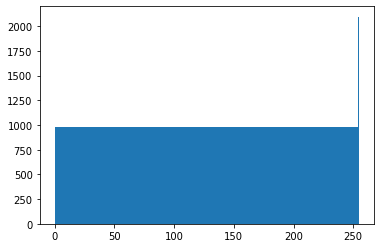

In [14]:
plt.hist(new_img_arr, bins=255, range=(0,255))
plt.show()

In [15]:
# reshape the new image
new_img_flat = np.reshape(new_img_arr, beans_arr.shape)

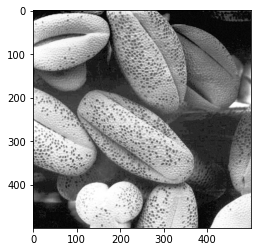

In [16]:
plt.imshow(new_img_flat, cmap='gray', vmin=0, vmax=255)
plt.show()